**Імпортування необхідних бібліотек**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

**Завдання 2**

In [38]:
df = pd.read_csv('store.csv')

<ipython-input-38-7aee243eb92e>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('store.csv')


**Завдання 3 та 4**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80475 entries, 0 to 80474
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80475 non-null  int64  
 1   DEALS_CARD_CODE           80475 non-null  int64  
 2   Month                     80475 non-null  int64  
 3   TotalSpent                80475 non-null  object 
 4   AvgCheck                  80475 non-null  float64
 5   VisitsPerMonth            80475 non-null  int64  
 6   UniqueProductsPerMonth    80475 non-null  int64  
 7   UniqueCategoriesPerMonth  80475 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 4.9+ MB


In [16]:
df.TotalSpent.astype('float64')

ValueError: ignored

In [40]:
df.replace(to_replace='f', value=np.nan, inplace=True)

In [41]:
df.TotalSpent=df.TotalSpent.astype('float64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80475 entries, 0 to 80474
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80475 non-null  int64  
 1   DEALS_CARD_CODE           80475 non-null  int64  
 2   Month                     80475 non-null  int64  
 3   TotalSpent                80474 non-null  float64
 4   AvgCheck                  80475 non-null  float64
 5   VisitsPerMonth            80475 non-null  int64  
 6   UniqueProductsPerMonth    80475 non-null  int64  
 7   UniqueCategoriesPerMonth  80475 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.9 MB


**Завдання 5**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80475 entries, 0 to 80474
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80475 non-null  int64  
 1   DEALS_CARD_CODE           80475 non-null  int64  
 2   Month                     80475 non-null  int64  
 3   TotalSpent                80474 non-null  float64
 4   AvgCheck                  80475 non-null  float64
 5   VisitsPerMonth            80475 non-null  int64  
 6   UniqueProductsPerMonth    80475 non-null  int64  
 7   UniqueCategoriesPerMonth  80475 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.9 MB


In [44]:
df.describe()

,Unnamed: 0,DEALS_CARD_CODE,Month,TotalSpent,AvgCheck,VisitsPerMonth,UniqueProductsPerMonth,UniqueCategoriesPerMonth
count,80475.000000,8.047500e+04,80475.000000,80474.000000,80475.000000,80475.000000,80475.000000,80475.000000
mean,40237.000000,2.254946e+12,4.692861,1742.290089,455.577765,4.381659,23.307623,8.126288
std,23231.275794,2.795285e+10,2.417625,3285.409811,539.396432,5.231029,27.755879,4.525662
min,0.000000,2.236300e+12,1.000000,-91.000000,-91.000000,1.000000,1.000000,1.000000
25%,20118.500000,2.236316e+12,3.000000,319.000000,145.000000,1.000000,6.000000,4.000000
50%,40237.000000,2.236363e+12,5.000000,850.315000,292.173333,3.000000,14.000000,8.000000
75%,60355.500000,2.296915e+12,7.000000,2090.397500,564.622143,5.000000,31.000000,12.000000
max,80474.000000,2.296991e+12,9.000000,285618.460000,19500.000000,160.000000,1623.000000,22.000000


**Завдання 6**

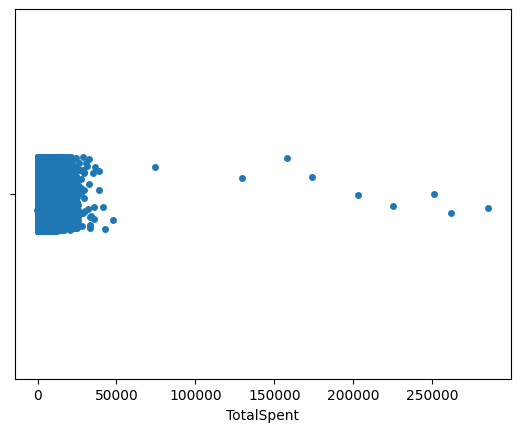

In [45]:
sns.stripplot(data=df, x='TotalSpent')
plt.show()

**Завдання 7**

In [46]:
df_1 = df.copy()

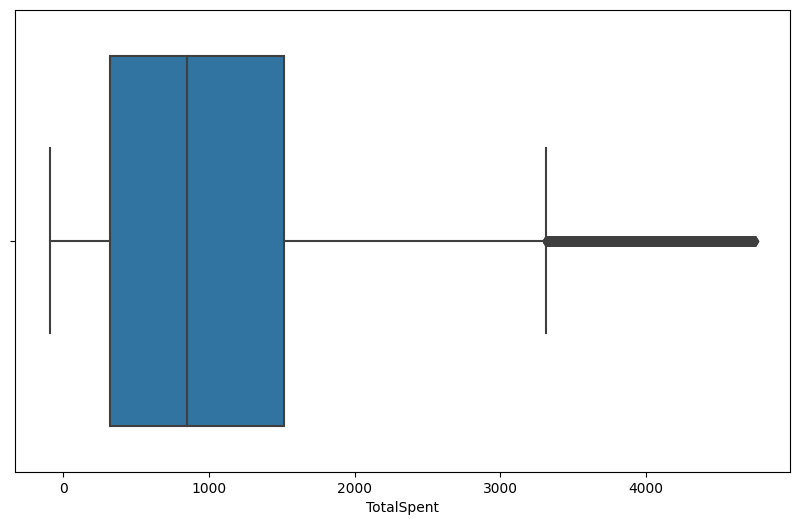

In [47]:
q1 = df_1['TotalSpent'].quantile(0.25)
q3 = df_1['TotalSpent'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_1[(df_1['TotalSpent'] < lower_bound) | (df_1['TotalSpent'] > upper_bound)]
df_1.loc[outliers.index, 'TotalSpent'] = df_1['TotalSpent'].median()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1, x='TotalSpent')
plt.show()

**Завдання 8**

In [60]:
def hempel_filter(data):
  series=data.copy()
  median = series.median()
  deviation = (series-median).abs()
  MAD = deviation.median()
  series[deviation>MAD*3]=np.nan
  return series

**Завдання 9**

In [61]:
df_2 = df.copy()

In [62]:
df_2=df.copy()
df_2_spent = hempel_filter(df.TotalSpent)
df_2.TotalSpent=df_2_spent

In [63]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80475 entries, 0 to 80474
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80475 non-null  int64  
 1   DEALS_CARD_CODE           80475 non-null  int64  
 2   Month                     80475 non-null  int64  
 3   TotalSpent                65965 non-null  float64
 4   AvgCheck                  80475 non-null  float64
 5   VisitsPerMonth            80475 non-null  int64  
 6   UniqueProductsPerMonth    80475 non-null  int64  
 7   UniqueCategoriesPerMonth  80475 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.9 MB


**Завдання 10**

In [54]:
df_3 = df.copy()

In [55]:

df_3.dropna(subset=['TotalSpent'], inplace=True)
values = df_3['TotalSpent'].values.reshape(-1, 1)
clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(values)
df_3.loc[outliers == -1, 'TotalSpent'] = np.nan

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80474 entries, 0 to 80474
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80474 non-null  int64  
 1   DEALS_CARD_CODE           80474 non-null  int64  
 2   Month                     80474 non-null  int64  
 3   TotalSpent                76450 non-null  float64
 4   AvgCheck                  80474 non-null  float64
 5   VisitsPerMonth            80474 non-null  int64  
 6   UniqueProductsPerMonth    80474 non-null  int64  
 7   UniqueCategoriesPerMonth  80474 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 5.5 MB


**Завдання 11**

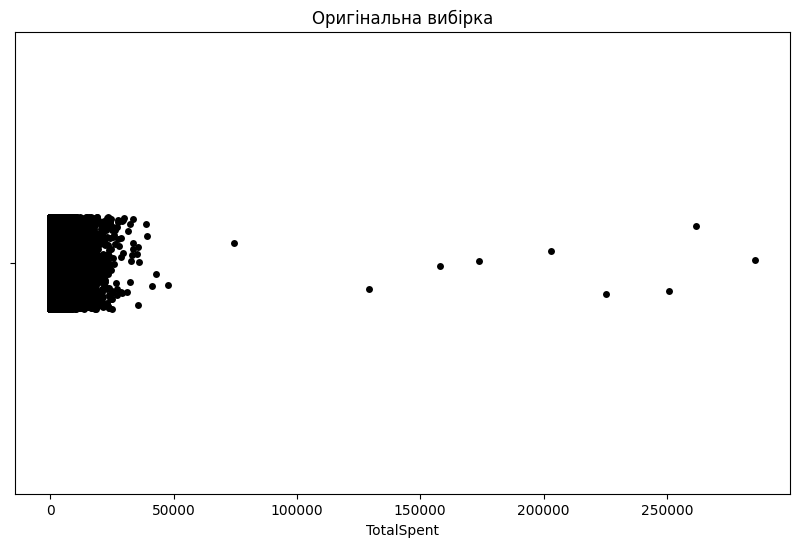

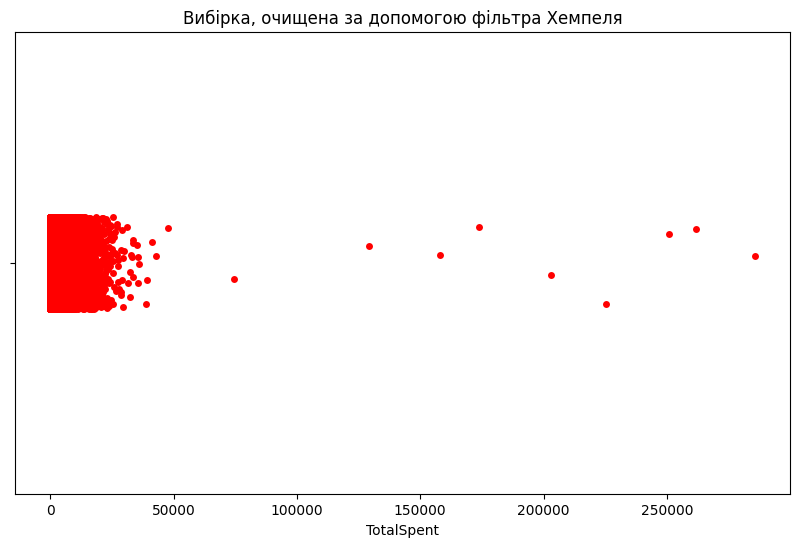

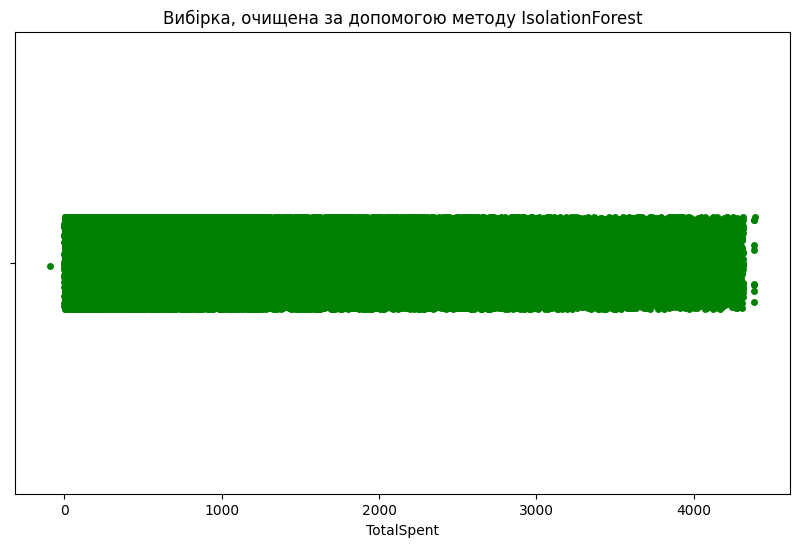

In [ ]:

plt.figure(figsize=(10, 6))
sns.stripplot(x=df['TotalSpent'], color='black')
plt.title('Оригінальна вибірка')
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x=df_2['TotalSpent'], color='red')
plt.title('Вибірка, очищена за допомогою фільтра Хемпеля')
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x=df_3['TotalSpent'], color='green')
plt.title('Вибірка, очищена за допомогою методу IsolationForest')
plt.show()

**Завдання 12**